C:\Users\Dom\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
import numpy as np
import pandas as pd
import time
import sklearn


readdata = pd.read_csv("/home/dom/Documents/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)


# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
    elif classification[i] == 2:
        data_colour.append("b")
    elif classification[i] == 3:
        data_colour.append("g")
        
# Normalizes the data        
for i in range(0, np.shape(data)[0]):
    data[i,:] = (data[i,:] / np.ndarray.max(data[i,:])) * 2 - 1
    
        


#VARIABLES
stepSize = 0.01
nSteps = 10000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(1, 2, d, theta[1,2])
    i = 1
    j = 2
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==1 and j==2:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData, tBeta


tData, tBeta = GrandTour(data, nSteps)


In [2]:
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
targetData = np.zeros((len(tData[0][0]), 3))
for counter, i in enumerate(classification):
    targetData[counter][int(i-1)] = 1
targetData

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [19]:
import time

accuracy = []

start = time.clock()

init_op = tf.global_variables_initializer()


    
iterations = 1000
for i in range(iterations):

    if i % 10 == 0 and i != 0:
        current_time = time.clock() - start
        time_left = (float(current_time) / i) * (iterations - i)
        print("Time elapsed: " + str(current_time))
        print("Timestep: " + str(i) + " out of " + str(iterations))
        print("Approximately " + str(int(time_left)) + " seconds left")
        
    tf.reset_default_graph()

    xData = tData[i][0]
    yData = tData[i][1]
    trainingData = np.vstack((xData, yData)).T
    # NN model code
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    nnet = model.fit(trainingData, targetData, epochs=2)
    accuracy.append(np.mean(nnet.history["acc"]))
    
print(accuracy)

Epoch 1/2
178/178 [==============================] - 0s 605us/step - loss: 6.4767 - acc: 0.1348
Epoch 2/2
178/178 [==============================] - 0s 48us/step - loss: 5.0497 - acc: 0.1292


Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7f90a93146a0>>
Traceback (most recent call last):
  File "/home/dom/.local/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/home/dom/.local/lib/python3.5/site-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 101313696


Epoch 1/2
178/178 [==============================] - 0s 742us/step - loss: 3.6766 - acc: 0.1292
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 2.6142 - acc: 0.1236
Epoch 1/2
178/178 [==============================] - 0s 685us/step - loss: 1.9990 - acc: 0.1292
Epoch 2/2
178/178 [==============================] - 0s 30us/step - loss: 1.6267 - acc: 0.0843
Epoch 1/2
178/178 [==============================] - 0s 588us/step - loss: 1.4324 - acc: 0.1236
Epoch 2/2
178/178 [==============================] - 0s 42us/step - loss: 1.2927 - acc: 0.1292
Epoch 1/2
178/178 [==============================] - 0s 633us/step - loss: 1.1838 - acc: 0.1798
Epoch 2/2
178/178 [==============================] - 0s 53us/step - loss: 1.1155 - acc: 0.2472
Epoch 1/2
178/178 [==============================] - 0s 632us/step - loss: 1.0811 - acc: 0.3258
Epoch 2/2
178/178 [==============================] - 0s 43us/step - loss: 1.0590 - acc: 0.3764
Epoch 1/2
178/178 [==========================

178/178 [==============================] - 0s 578us/step - loss: 0.8831 - acc: 0.6067
Epoch 2/2
178/178 [==============================] - 0s 33us/step - loss: 0.8801 - acc: 0.6067
Epoch 1/2
178/178 [==============================] - 0s 583us/step - loss: 0.8830 - acc: 0.6067
Epoch 2/2
178/178 [==============================] - 0s 41us/step - loss: 0.8788 - acc: 0.6124
Epoch 1/2
178/178 [==============================] - 0s 582us/step - loss: 0.8808 - acc: 0.6180
Epoch 2/2
178/178 [==============================] - 0s 45us/step - loss: 0.8774 - acc: 0.6180
Epoch 1/2
178/178 [==============================] - 0s 608us/step - loss: 0.8787 - acc: 0.6011
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.8735 - acc: 0.6180
Epoch 1/2
178/178 [==============================] - 0s 588us/step - loss: 0.8721 - acc: 0.6011
Epoch 2/2
178/178 [==============================] - 0s 38us/step - loss: 0.8681 - acc: 0.6124
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 618us/step - loss: 0.5094 - acc: 0.8146
Epoch 2/2
178/178 [==============================] - 0s 31us/step - loss: 0.5004 - acc: 0.8258
Epoch 1/2
178/178 [==============================] - 0s 638us/step - loss: 0.4967 - acc: 0.8258
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.4904 - acc: 0.8371
Epoch 1/2
178/178 [==============================] - 0s 655us/step - loss: 0.4883 - acc: 0.8258
Epoch 2/2
178/178 [==============================] - 0s 52us/step - loss: 0.4811 - acc: 0.8258
Epoch 1/2
178/178 [==============================] - 0s 659us/step - loss: 0.4796 - acc: 0.8258
Epoch 2/2
178/178 [==============================] - 0s 46us/step - loss: 0.4739 - acc: 0.8315
Epoch 1/2
178/178 [==============================] - 0s 637us/step - loss: 0.4730 - acc: 0.8315
Epoch 2/2
178/178 [==============================] - 0s 45us/step - loss: 0.4661 - acc: 0.8315
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 647us/step - loss: 0.5141 - acc: 0.7978
Epoch 2/2
178/178 [==============================] - 0s 29us/step - loss: 0.5105 - acc: 0.7978
Epoch 1/2
178/178 [==============================] - 0s 885us/step - loss: 0.5503 - acc: 0.7865
Epoch 2/2
178/178 [==============================] - 0s 32us/step - loss: 0.5425 - acc: 0.7921
Epoch 1/2
178/178 [==============================] - 0s 584us/step - loss: 0.5905 - acc: 0.7697
Epoch 2/2
178/178 [==============================] - 0s 52us/step - loss: 0.5857 - acc: 0.7809
Epoch 1/2
178/178 [==============================] - 0s 637us/step - loss: 0.6424 - acc: 0.7472
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 0.6377 - acc: 0.7472
Epoch 1/2
178/178 [==============================] - 0s 613us/step - loss: 0.7073 - acc: 0.7191
Epoch 2/2
178/178 [==============================] - 0s 43us/step - loss: 0.7034 - acc: 0.7303
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 588us/step - loss: 0.4049 - acc: 0.8596
Epoch 2/2
178/178 [==============================] - 0s 36us/step - loss: 0.3999 - acc: 0.8596
Epoch 1/2
178/178 [==============================] - 0s 692us/step - loss: 0.3983 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 35us/step - loss: 0.3935 - acc: 0.8652
Epoch 1/2
178/178 [==============================] - 0s 671us/step - loss: 0.3959 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 40us/step - loss: 0.3893 - acc: 0.8708
Epoch 1/2
178/178 [==============================] - 0s 691us/step - loss: 0.3917 - acc: 0.8820
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 0.3870 - acc: 0.8708
Epoch 1/2
178/178 [==============================] - 0s 642us/step - loss: 0.3938 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 45us/step - loss: 0.3861 - acc: 0.8652
Time elapsed: 98.786522
Timestep: 170 out of 1000
Appro

178/178 [==============================] - 0s 667us/step - loss: 0.5052 - acc: 0.7753
Epoch 2/2
178/178 [==============================] - 0s 35us/step - loss: 0.5026 - acc: 0.7809
Epoch 1/2
178/178 [==============================] - 0s 678us/step - loss: 0.4959 - acc: 0.7809
Epoch 2/2
178/178 [==============================] - 0s 39us/step - loss: 0.4920 - acc: 0.7865
Epoch 1/2
178/178 [==============================] - 0s 755us/step - loss: 0.4850 - acc: 0.8034
Epoch 2/2
178/178 [==============================] - 0s 36us/step - loss: 0.4795 - acc: 0.8034
Epoch 1/2
178/178 [==============================] - 0s 845us/step - loss: 0.4736 - acc: 0.8202
Epoch 2/2
178/178 [==============================] - 0s 36us/step - loss: 0.4714 - acc: 0.8146
Time elapsed: 122.18469499999999
Timestep: 210 out of 1000
Approximately 459 seconds left
Epoch 1/2
178/178 [==============================] - 0s 783us/step - loss: 0.4639 - acc: 0.8315
Epoch 2/2
178/178 [==============================] - 0s 41us

178/178 [==============================] - 0s 627us/step - loss: 0.5137 - acc: 0.7753
Epoch 2/2
178/178 [==============================] - 0s 29us/step - loss: 0.5053 - acc: 0.7865
Epoch 1/2
178/178 [==============================] - 0s 585us/step - loss: 0.4943 - acc: 0.7697
Epoch 2/2
178/178 [==============================] - 0s 41us/step - loss: 0.4899 - acc: 0.8034
Epoch 1/2
178/178 [==============================] - 0s 633us/step - loss: 0.4793 - acc: 0.8146
Epoch 2/2
178/178 [==============================] - 0s 52us/step - loss: 0.4762 - acc: 0.7865
Time elapsed: 145.788046
Timestep: 250 out of 1000
Approximately 437 seconds left
Epoch 1/2
178/178 [==============================] - 0s 642us/step - loss: 0.4681 - acc: 0.7921
Epoch 2/2
178/178 [==============================] - 0s 30us/step - loss: 0.4598 - acc: 0.8034
Epoch 1/2
178/178 [==============================] - 0s 595us/step - loss: 0.4521 - acc: 0.8034
Epoch 2/2
178/178 [==============================] - 0s 47us/step - 

178/178 [==============================] - 0s 677us/step - loss: 0.3398 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 46us/step - loss: 0.3355 - acc: 0.8596
Epoch 1/2
178/178 [==============================] - 0s 634us/step - loss: 0.3340 - acc: 0.8596
Epoch 2/2
178/178 [==============================] - 0s 45us/step - loss: 0.3278 - acc: 0.8652
Time elapsed: 168.25934
Timestep: 290 out of 1000
Approximately 411 seconds left
Epoch 1/2
178/178 [==============================] - 0s 594us/step - loss: 0.3278 - acc: 0.8596
Epoch 2/2
178/178 [==============================] - 0s 46us/step - loss: 0.3237 - acc: 0.8708
Epoch 1/2
178/178 [==============================] - 0s 604us/step - loss: 0.3249 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 44us/step - loss: 0.3219 - acc: 0.8596
Epoch 1/2
178/178 [==============================] - 0s 639us/step - loss: 0.3238 - acc: 0.8539
Epoch 2/2
178/178 [==============================] - 0s 46us/step - l

178/178 [==============================] - 0s 581us/step - loss: 0.7829 - acc: 0.6461
Epoch 2/2
178/178 [==============================] - 0s 29us/step - loss: 0.7609 - acc: 0.6404
Time elapsed: 191.05132599999996
Timestep: 330 out of 1000
Approximately 387 seconds left
Epoch 1/2
178/178 [==============================] - 0s 807us/step - loss: 0.7430 - acc: 0.6573
Epoch 2/2
178/178 [==============================] - 0s 42us/step - loss: 0.7268 - acc: 0.6742
Epoch 1/2
178/178 [==============================] - 0s 797us/step - loss: 0.7074 - acc: 0.6685
Epoch 2/2
178/178 [==============================] - 0s 41us/step - loss: 0.6942 - acc: 0.6854
Epoch 1/2
178/178 [==============================] - 0s 807us/step - loss: 0.6765 - acc: 0.7022
Epoch 2/2
178/178 [==============================] - 0s 41us/step - loss: 0.6674 - acc: 0.7079
Epoch 1/2
178/178 [==============================] - 0s 1ms/step - loss: 0.6503 - acc: 0.7191
Epoch 2/2
178/178 [==============================] - 0s 90us/s

Epoch 1/2
178/178 [==============================] - 0s 709us/step - loss: 0.4526 - acc: 0.7921
Epoch 2/2
178/178 [==============================] - 0s 39us/step - loss: 0.4504 - acc: 0.7921
Epoch 1/2
178/178 [==============================] - 0s 765us/step - loss: 0.4569 - acc: 0.7809
Epoch 2/2
178/178 [==============================] - 0s 49us/step - loss: 0.4562 - acc: 0.7809
Epoch 1/2
178/178 [==============================] - 0s 785us/step - loss: 0.4623 - acc: 0.7809
Epoch 2/2
178/178 [==============================] - 0s 57us/step - loss: 0.4599 - acc: 0.7809
Epoch 1/2
178/178 [==============================] - 0s 718us/step - loss: 0.4665 - acc: 0.7809
Epoch 2/2
178/178 [==============================] - 0s 46us/step - loss: 0.4675 - acc: 0.7753
Epoch 1/2
178/178 [==============================] - 0s 601us/step - loss: 0.4708 - acc: 0.7809
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.4694 - acc: 0.7753
Epoch 1/2
178/178 [==========================

178/178 [==============================] - 0s 599us/step - loss: 0.5604 - acc: 0.6910
Epoch 2/2
178/178 [==============================] - 0s 34us/step - loss: 0.5594 - acc: 0.6966
Epoch 1/2
178/178 [==============================] - 0s 615us/step - loss: 0.5589 - acc: 0.7022
Epoch 2/2
178/178 [==============================] - 0s 53us/step - loss: 0.5594 - acc: 0.7022
Epoch 1/2
178/178 [==============================] - 0s 692us/step - loss: 0.5612 - acc: 0.7022
Epoch 2/2
178/178 [==============================] - 0s 58us/step - loss: 0.5573 - acc: 0.6910
Epoch 1/2
178/178 [==============================] - 0s 631us/step - loss: 0.5562 - acc: 0.6910
Epoch 2/2
178/178 [==============================] - 0s 45us/step - loss: 0.5548 - acc: 0.7191
Epoch 1/2
178/178 [==============================] - 0s 617us/step - loss: 0.5571 - acc: 0.7079
Epoch 2/2
178/178 [==============================] - 0s 50us/step - loss: 0.5562 - acc: 0.7022
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 616us/step - loss: 0.4382 - acc: 0.8146
Epoch 2/2
178/178 [==============================] - 0s 32us/step - loss: 0.4351 - acc: 0.8146
Epoch 1/2
178/178 [==============================] - 0s 632us/step - loss: 0.4333 - acc: 0.8146
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.4322 - acc: 0.8090
Epoch 1/2
178/178 [==============================] - 0s 635us/step - loss: 0.4299 - acc: 0.8090
Epoch 2/2
178/178 [==============================] - 0s 42us/step - loss: 0.4264 - acc: 0.8090
Epoch 1/2
178/178 [==============================] - 0s 598us/step - loss: 0.4250 - acc: 0.8034
Epoch 2/2
178/178 [==============================] - 0s 44us/step - loss: 0.4234 - acc: 0.8034
Epoch 1/2
178/178 [==============================] - 0s 619us/step - loss: 0.4208 - acc: 0.8090
Epoch 2/2
178/178 [==============================] - 0s 43us/step - loss: 0.4183 - acc: 0.8202
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 624us/step - loss: 0.2453 - acc: 0.8933
Epoch 2/2
178/178 [==============================] - 0s 34us/step - loss: 0.2428 - acc: 0.8989
Epoch 1/2
178/178 [==============================] - 0s 604us/step - loss: 0.2569 - acc: 0.8820
Epoch 2/2
178/178 [==============================] - 0s 43us/step - loss: 0.2552 - acc: 0.8820
Epoch 1/2
178/178 [==============================] - 0s 625us/step - loss: 0.2704 - acc: 0.8483
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.2707 - acc: 0.8483
Epoch 1/2
178/178 [==============================] - 0s 602us/step - loss: 0.2881 - acc: 0.8483
Epoch 2/2
178/178 [==============================] - 0s 39us/step - loss: 0.2849 - acc: 0.8483
Epoch 1/2
178/178 [==============================] - 0s 674us/step - loss: 0.3057 - acc: 0.8315
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 0.3056 - acc: 0.8371
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 658us/step - loss: 0.2709 - acc: 0.8933
Epoch 2/2
178/178 [==============================] - 0s 34us/step - loss: 0.2672 - acc: 0.8989
Epoch 1/2
178/178 [==============================] - 0s 817us/step - loss: 0.2683 - acc: 0.8989
Epoch 2/2
178/178 [==============================] - 0s 38us/step - loss: 0.2656 - acc: 0.8933
Epoch 1/2
178/178 [==============================] - 0s 788us/step - loss: 0.2654 - acc: 0.8933
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 0.2629 - acc: 0.8933
Epoch 1/2
178/178 [==============================] - 0s 679us/step - loss: 0.2634 - acc: 0.8933
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.2608 - acc: 0.8933
Epoch 1/2
178/178 [==============================] - 0s 678us/step - loss: 0.2607 - acc: 0.8933
Epoch 2/2
178/178 [==============================] - 0s 46us/step - loss: 0.2590 - acc: 0.8933
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 623us/step - loss: 0.2912 - acc: 0.8764
Epoch 2/2
178/178 [==============================] - 0s 31us/step - loss: 0.2845 - acc: 0.8820
Epoch 1/2
178/178 [==============================] - 0s 759us/step - loss: 0.2980 - acc: 0.8708
Epoch 2/2
178/178 [==============================] - 0s 48us/step - loss: 0.2924 - acc: 0.8708
Epoch 1/2
178/178 [==============================] - 0s 782us/step - loss: 0.3057 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 50us/step - loss: 0.2991 - acc: 0.8876
Epoch 1/2
178/178 [==============================] - 0s 842us/step - loss: 0.3129 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 84us/step - loss: 0.3092 - acc: 0.8876
Epoch 1/2
178/178 [==============================] - 0s 821us/step - loss: 0.3211 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 61us/step - loss: 0.3171 - acc: 0.8764
Time elapsed: 343.091817
Timestep: 580 out of 1000
Appr

178/178 [==============================] - 0s 704us/step - loss: 0.5432 - acc: 0.7753
Epoch 2/2
178/178 [==============================] - 0s 54us/step - loss: 0.5441 - acc: 0.7753
Epoch 1/2
178/178 [==============================] - 0s 723us/step - loss: 0.5382 - acc: 0.7809
Epoch 2/2
178/178 [==============================] - 0s 32us/step - loss: 0.5322 - acc: 0.7865
Epoch 1/2
178/178 [==============================] - 0s 913us/step - loss: 0.5314 - acc: 0.7865
Epoch 2/2
178/178 [==============================] - 0s 50us/step - loss: 0.5293 - acc: 0.7809
Epoch 1/2
178/178 [==============================] - 0s 861us/step - loss: 0.5314 - acc: 0.7809
Epoch 2/2
178/178 [==============================] - 0s 34us/step - loss: 0.5258 - acc: 0.7809
Time elapsed: 370.805593
Timestep: 620 out of 1000
Approximately 227 seconds left
Epoch 1/2
178/178 [==============================] - 0s 694us/step - loss: 0.5244 - acc: 0.7809
Epoch 2/2
178/178 [==============================] - 0s 38us/step - 

178/178 [==============================] - 0s 729us/step - loss: 0.6445 - acc: 0.7360
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 0.6423 - acc: 0.7416
Epoch 1/2
178/178 [==============================] - 0s 651us/step - loss: 0.6442 - acc: 0.7416
Epoch 2/2
178/178 [==============================] - 0s 28us/step - loss: 0.6429 - acc: 0.7416
Epoch 1/2
178/178 [==============================] - 0s 663us/step - loss: 0.6430 - acc: 0.7416
Epoch 2/2
178/178 [==============================] - 0s 30us/step - loss: 0.6411 - acc: 0.7303
Time elapsed: 395.575716
Timestep: 660 out of 1000
Approximately 203 seconds left
Epoch 1/2
178/178 [==============================] - 0s 645us/step - loss: 0.6423 - acc: 0.7247
Epoch 2/2
178/178 [==============================] - 0s 35us/step - loss: 0.6413 - acc: 0.7303
Epoch 1/2
178/178 [==============================] - 0s 654us/step - loss: 0.6433 - acc: 0.7191
Epoch 2/2
178/178 [==============================] - 0s 31us/step - 

178/178 [==============================] - 0s 686us/step - loss: 0.5952 - acc: 0.7135
Epoch 2/2
178/178 [==============================] - 0s 35us/step - loss: 0.5896 - acc: 0.7303
Epoch 1/2
178/178 [==============================] - 0s 867us/step - loss: 0.5875 - acc: 0.7303
Epoch 2/2
178/178 [==============================] - 0s 38us/step - loss: 0.5849 - acc: 0.6966
Time elapsed: 419.850643
Timestep: 700 out of 1000
Approximately 179 seconds left
Epoch 1/2
178/178 [==============================] - 0s 659us/step - loss: 0.5812 - acc: 0.7022
Epoch 2/2
178/178 [==============================] - 0s 41us/step - loss: 0.5783 - acc: 0.7022
Epoch 1/2
178/178 [==============================] - 0s 675us/step - loss: 0.5761 - acc: 0.7079
Epoch 2/2
178/178 [==============================] - 0s 39us/step - loss: 0.5756 - acc: 0.7135
Epoch 1/2
178/178 [==============================] - 0s 765us/step - loss: 0.5745 - acc: 0.7022
Epoch 2/2
178/178 [==============================] - 0s 30us/step - 

178/178 [==============================] - 0s 616us/step - loss: 0.7317 - acc: 0.7191
Epoch 2/2
178/178 [==============================] - 0s 36us/step - loss: 0.7278 - acc: 0.7247
Time elapsed: 443.505953
Timestep: 740 out of 1000
Approximately 155 seconds left
Epoch 1/2
178/178 [==============================] - 0s 635us/step - loss: 0.7468 - acc: 0.7022
Epoch 2/2
178/178 [==============================] - 0s 32us/step - loss: 0.7450 - acc: 0.6966
Epoch 1/2
178/178 [==============================] - 0s 626us/step - loss: 0.7593 - acc: 0.6910
Epoch 2/2
178/178 [==============================] - 0s 29us/step - loss: 0.7553 - acc: 0.6966
Epoch 1/2
178/178 [==============================] - 0s 630us/step - loss: 0.7737 - acc: 0.6854
Epoch 2/2
178/178 [==============================] - 0s 32us/step - loss: 0.7687 - acc: 0.6854
Epoch 1/2
178/178 [==============================] - 0s 639us/step - loss: 0.7887 - acc: 0.6685
Epoch 2/2
178/178 [==============================] - 0s 32us/step - 

Epoch 1/2
178/178 [==============================] - 0s 745us/step - loss: 0.4744 - acc: 0.8146
Epoch 2/2
178/178 [==============================] - 0s 41us/step - loss: 0.4738 - acc: 0.8146
Epoch 1/2
178/178 [==============================] - 0s 839us/step - loss: 0.4691 - acc: 0.8090
Epoch 2/2
178/178 [==============================] - 0s 41us/step - loss: 0.4676 - acc: 0.8034
Epoch 1/2
178/178 [==============================] - 0s 601us/step - loss: 0.4662 - acc: 0.8090
Epoch 2/2
178/178 [==============================] - 0s 29us/step - loss: 0.4644 - acc: 0.8146
Epoch 1/2
178/178 [==============================] - 0s 616us/step - loss: 0.4581 - acc: 0.8034
Epoch 2/2
178/178 [==============================] - 0s 39us/step - loss: 0.4578 - acc: 0.8090
Epoch 1/2
178/178 [==============================] - 0s 666us/step - loss: 0.4563 - acc: 0.8090
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.4550 - acc: 0.8090
Epoch 1/2
178/178 [==========================

178/178 [==============================] - 0s 726us/step - loss: 0.3924 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 29us/step - loss: 0.3883 - acc: 0.8596
Epoch 1/2
178/178 [==============================] - 0s 730us/step - loss: 0.3921 - acc: 0.8483
Epoch 2/2
178/178 [==============================] - 0s 29us/step - loss: 0.3892 - acc: 0.8427
Epoch 1/2
178/178 [==============================] - 0s 760us/step - loss: 0.3920 - acc: 0.8371
Epoch 2/2
178/178 [==============================] - 0s 31us/step - loss: 0.3883 - acc: 0.8427
Epoch 1/2
178/178 [==============================] - 0s 765us/step - loss: 0.3911 - acc: 0.8371
Epoch 2/2
178/178 [==============================] - 0s 39us/step - loss: 0.3869 - acc: 0.8315
Epoch 1/2
178/178 [==============================] - 0s 709us/step - loss: 0.3890 - acc: 0.8315
Epoch 2/2
178/178 [==============================] - 0s 54us/step - loss: 0.3842 - acc: 0.8315
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 739us/step - loss: 0.4384 - acc: 0.8483
Epoch 2/2
178/178 [==============================] - 0s 31us/step - loss: 0.4389 - acc: 0.8483
Epoch 1/2
178/178 [==============================] - 0s 608us/step - loss: 0.4608 - acc: 0.8371
Epoch 2/2
178/178 [==============================] - 0s 31us/step - loss: 0.4596 - acc: 0.8371
Epoch 1/2
178/178 [==============================] - 0s 642us/step - loss: 0.4864 - acc: 0.8202
Epoch 2/2
178/178 [==============================] - 0s 30us/step - loss: 0.4845 - acc: 0.8202
Epoch 1/2
178/178 [==============================] - 0s 614us/step - loss: 0.5138 - acc: 0.8090
Epoch 2/2
178/178 [==============================] - 0s 29us/step - loss: 0.5122 - acc: 0.8146
Epoch 1/2
178/178 [==============================] - 0s 610us/step - loss: 0.5435 - acc: 0.8034
Epoch 2/2
178/178 [==============================] - 0s 30us/step - loss: 0.5419 - acc: 0.7978
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 635us/step - loss: 0.3553 - acc: 0.8764
Epoch 2/2
178/178 [==============================] - 0s 33us/step - loss: 0.3547 - acc: 0.8820
Epoch 1/2
178/178 [==============================] - 0s 717us/step - loss: 0.3599 - acc: 0.8708
Epoch 2/2
178/178 [==============================] - 0s 35us/step - loss: 0.3567 - acc: 0.8764
Epoch 1/2
178/178 [==============================] - 0s 703us/step - loss: 0.3629 - acc: 0.8708
Epoch 2/2
178/178 [==============================] - 0s 38us/step - loss: 0.3634 - acc: 0.8708
Epoch 1/2
178/178 [==============================] - 0s 838us/step - loss: 0.3697 - acc: 0.8596
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 0.3701 - acc: 0.8652
Epoch 1/2
178/178 [==============================] - 0s 674us/step - loss: 0.3804 - acc: 0.8596
Epoch 2/2
178/178 [==============================] - 0s 44us/step - loss: 0.3786 - acc: 0.8596
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 677us/step - loss: 0.5908 - acc: 0.7360
Epoch 2/2
178/178 [==============================] - 0s 33us/step - loss: 0.5913 - acc: 0.7472
Epoch 1/2
178/178 [==============================] - 0s 597us/step - loss: 0.6024 - acc: 0.7303
Epoch 2/2
178/178 [==============================] - 0s 32us/step - loss: 0.5946 - acc: 0.7416
Epoch 1/2
178/178 [==============================] - 0s 712us/step - loss: 0.6163 - acc: 0.7247
Epoch 2/2
178/178 [==============================] - 0s 34us/step - loss: 0.6029 - acc: 0.7303
Epoch 1/2
178/178 [==============================] - 0s 699us/step - loss: 0.6187 - acc: 0.7303
Epoch 2/2
178/178 [==============================] - 0s 55us/step - loss: 0.6103 - acc: 0.7360
Epoch 1/2
178/178 [==============================] - 0s 686us/step - loss: 0.6276 - acc: 0.6966
Epoch 2/2
178/178 [==============================] - 0s 33us/step - loss: 0.6111 - acc: 0.7135
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 622us/step - loss: 0.5878 - acc: 0.7640
Epoch 2/2
178/178 [==============================] - 0s 38us/step - loss: 0.5832 - acc: 0.7697
Epoch 1/2
178/178 [==============================] - 0s 677us/step - loss: 0.5883 - acc: 0.7640
Epoch 2/2
178/178 [==============================] - 0s 28us/step - loss: 0.5836 - acc: 0.7640
Epoch 1/2
178/178 [==============================] - 0s 620us/step - loss: 0.5874 - acc: 0.7697
Epoch 2/2
178/178 [==============================] - 0s 33us/step - loss: 0.5815 - acc: 0.7640
Epoch 1/2
178/178 [==============================] - 0s 625us/step - loss: 0.5836 - acc: 0.7584
Epoch 2/2
178/178 [==============================] - 0s 31us/step - loss: 0.5814 - acc: 0.7697
Epoch 1/2
178/178 [==============================] - 0s 746us/step - loss: 0.5803 - acc: 0.7697
Epoch 2/2
178/178 [==============================] - 0s 38us/step - loss: 0.5810 - acc: 0.7697
Time elapsed: 592.276884
Timestep: 990 out of 1000
Appr

In [6]:
np.savetxt("NNAcc.csv", accuracy, delimiter=",")


tData[0]

98 0.8567415723639928


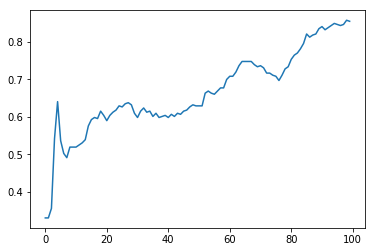

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(0, len(accuracy)))

new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")

max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)

In [123]:
# NN model code
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
abcd = model.fit(trainingData, targetData, epochs=100, validation_split=0.2)

abcd.history["acc"]


Train on 113 samples, validate on 29 samples
Epoch 1/100
113/113 [==============================] - 2s 13ms/step - loss: 1.1139 - acc: 0.3894 - val_loss: 1.1106 - val_acc: 0.3448
Epoch 2/100
113/113 [==============================] - 0s 88us/step - loss: 1.1048 - acc: 0.3628 - val_loss: 1.1020 - val_acc: 0.3448
Epoch 3/100
113/113 [==============================] - 0s 88us/step - loss: 1.0962 - acc: 0.3628 - val_loss: 1.0947 - val_acc: 0.3448
Epoch 4/100
113/113 [==============================] - 0s 97us/step - loss: 1.0903 - acc: 0.3628 - val_loss: 1.0901 - val_acc: 0.3448
Epoch 5/100
113/113 [==============================] - 0s 88us/step - loss: 1.0863 - acc: 0.3628 - val_loss: 1.0866 - val_acc: 0.3448
Epoch 6/100
113/113 [==============================] - 0s 88us/step - loss: 1.0829 - acc: 0.3628 - val_loss: 1.0832 - val_acc: 0.3448
Epoch 7/100
113/113 [==============================] - 0s 88us/step - loss: 1.0800 - acc: 0.3628 - val_loss: 1.0803 - val_acc: 0.3448
Epoch 8/100
113/1

[0.3893805317646634,
 0.36283185919829175,
 0.3628318602532412,
 0.3628318597257665,
 0.3628318602532412,
 0.362831858670817,
 0.3628318602532412,
 0.3628318602532412,
 0.36283185906642307,
 0.3628318597257665,
 0.3628318597257665,
 0.36283185853894834,
 0.3893805328196129,
 0.39823008915491864,
 0.3982300903417368,
 0.40707964733638596,
 0.407079650237497,
 0.4159292048585098,
 0.4159292048585098,
 0.41592920723214616,
 0.38938053519324917,
 0.3982300887593126,
 0.3982300887593126,
 0.4159292048585098,
 0.4159292043310351,
 0.42477876290810845,
 0.4336283187159395,
 0.4336283222763939,
 0.44247787742488154,
 0.44247787742488154,
 0.46017699194165457,
 0.4601769924691293,
 0.4601769924691293,
 0.44247788032599256,
 0.46017699141417984,
 0.46017699128231115,
 0.46017699194165457,
 0.46017699194165457,
 0.4601769953702403,
 0.46902654893630374,
 0.4690265528923642,
 0.46017699194165457,
 0.47787610645842765,
 0.48672566450802623,
 0.47787610645842765,
 0.48672566450802623,
 0.51327433839

In [17]:
new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")



max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)

NameError: name 'plt' is not defined

In [19]:
trainingData = np.vstack((xData, yData)).T
np.shape(trainingData)

(178, 2)

In [34]:
Data = np.transpose(tData[0])

print(np.shape(Data))
print(np.shape(targetData))

(178, 13)
(178, 3)


In [60]:

# Neural net on the high dimensional space
Data = np.transpose(tData[0])

# NN model code
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(50, input_dim = 13, 
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

nnet = model.fit(Data, targetData, epochs=3)
accuracy.append(np.mean(nnet.history["acc"]))

Epoch 1/3


InvalidArgumentError: Tensor dense_3_input:0, specified in either feed_devices or fetch_devices was not found in the Graph

In [28]:
init_op = tf.global_variables_initializer()
tf.reset_default_graph()

from keras import backend as K
K.clear_session()


xData = tData[max_accuracy][0]
yData = tData[max_accuracy][1]

trainingData = np.vstack((xData, yData)).T

# NN model code
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
nnet = model.fit(trainingData, targetData, epochs=10)

xy_points = []
for i in range(100):
    for j in range(100):
        x = (2 * i - 100) / 100
        y = (2 * j - 100) / 100
        xy_points.append([x, y])
        
#score = model.evaluate(X_test, Y_test, verbose=0)

model.predict_classes(xy_points[0])


Epoch 1/10
178/178 [==============================] - 0s 530us/step - loss: 0.1689 - acc: 0.9494
Epoch 2/10
178/178 [==============================] - 0s 39us/step - loss: 0.1686 - acc: 0.9494
Epoch 3/10
178/178 [==============================] - 0s 37us/step - loss: 0.1689 - acc: 0.9494
Epoch 4/10
178/178 [==============================] - 0s 31us/step - loss: 0.1688 - acc: 0.9494
Epoch 5/10
178/178 [==============================] - 0s 43us/step - loss: 0.1688 - acc: 0.9438
Epoch 6/10
178/178 [==============================] - 0s 33us/step - loss: 0.1680 - acc: 0.9438
Epoch 7/10
178/178 [==============================] - 0s 56us/step - loss: 0.1680 - acc: 0.9494
Epoch 8/10
178/178 [==============================] - 0s 36us/step - loss: 0.1679 - acc: 0.9494
Epoch 9/10
178/178 [==============================] - 0s 44us/step - loss: 0.1676 - acc: 0.9494
Epoch 10/10
178/178 [==============================] - 0s 33us/step - loss: 0.1675 - acc: 0.9494


NotFoundError: PruneForTargets: Some target nodes not found: group_deps 

In [5]:
model.predict_classes(xy_points[0])


NameError: name 'xy_points' is not defined

In [11]:
type(tData[0])

numpy.ndarray

In [16]:

tf.reset_default_graph()


trainingData = tData[0].T

# NN model code
model = 0
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_dim = 13))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
nnet = model.fit(trainingData, targetData, epochs=5)
accuracy.append(np.mean(nnet.history["acc"]))


Epoch 1/5


InvalidArgumentError: Tensor dense_input:0, specified in either feed_devices or fetch_devices was not found in the Graph